# DEEP FAKE 

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
import warnings
from IPython.display import HTML
warnings.filterwarnings('ignore')

In [12]:
source_image = imageio.imread(r"C:\Users\USER\Desktop\Deep fake\dataset\brunette-young-woman-posing.jpg")
driver_video = imageio.get_reader(r"C:\Users\USER\Downloads\Video\3761460-uhd_3840_2160_25fps.mp4")

In [13]:
#resize

source_image = resize(source_image,(256,256))
driver_video = [resize(frame,(256,256)) for frame in driver_video]

KeyboardInterrupt: 

In [4]:
source_image

array([[[0.86773694, 0.91888063, 0.93258182],
        [0.86925937, 0.9209373 , 0.93449163],
        [0.87214798, 0.92241281, 0.93655758],
        ...,
        [0.85399855, 0.89628162, 0.90448836],
        [0.850876  , 0.89379781, 0.90200983],
        [0.84660271, 0.89077514, 0.89903778]],

       [[0.86979621, 0.91981128, 0.93305734],
        [0.87271005, 0.92057797, 0.93618036],
        [0.87564659, 0.92233658, 0.93839947],
        ...,
        [0.85597597, 0.89509066, 0.90520022],
        [0.85330424, 0.89290394, 0.90279779],
        [0.84973479, 0.89074363, 0.90025324]],

       [[0.87226878, 0.92192687, 0.93063102],
        [0.87522181, 0.92358144, 0.935859  ],
        [0.87858793, 0.92396349, 0.93971655],
        ...,
        [0.85662873, 0.8948406 , 0.90511921],
        [0.85469871, 0.89233888, 0.90226174],
        [0.8518088 , 0.89146535, 0.9006323 ]],

       ...,

       [[0.92252975, 0.96982727, 0.99198611],
        [0.92574546, 0.96943636, 0.99197675],
        [0.92790525, 0

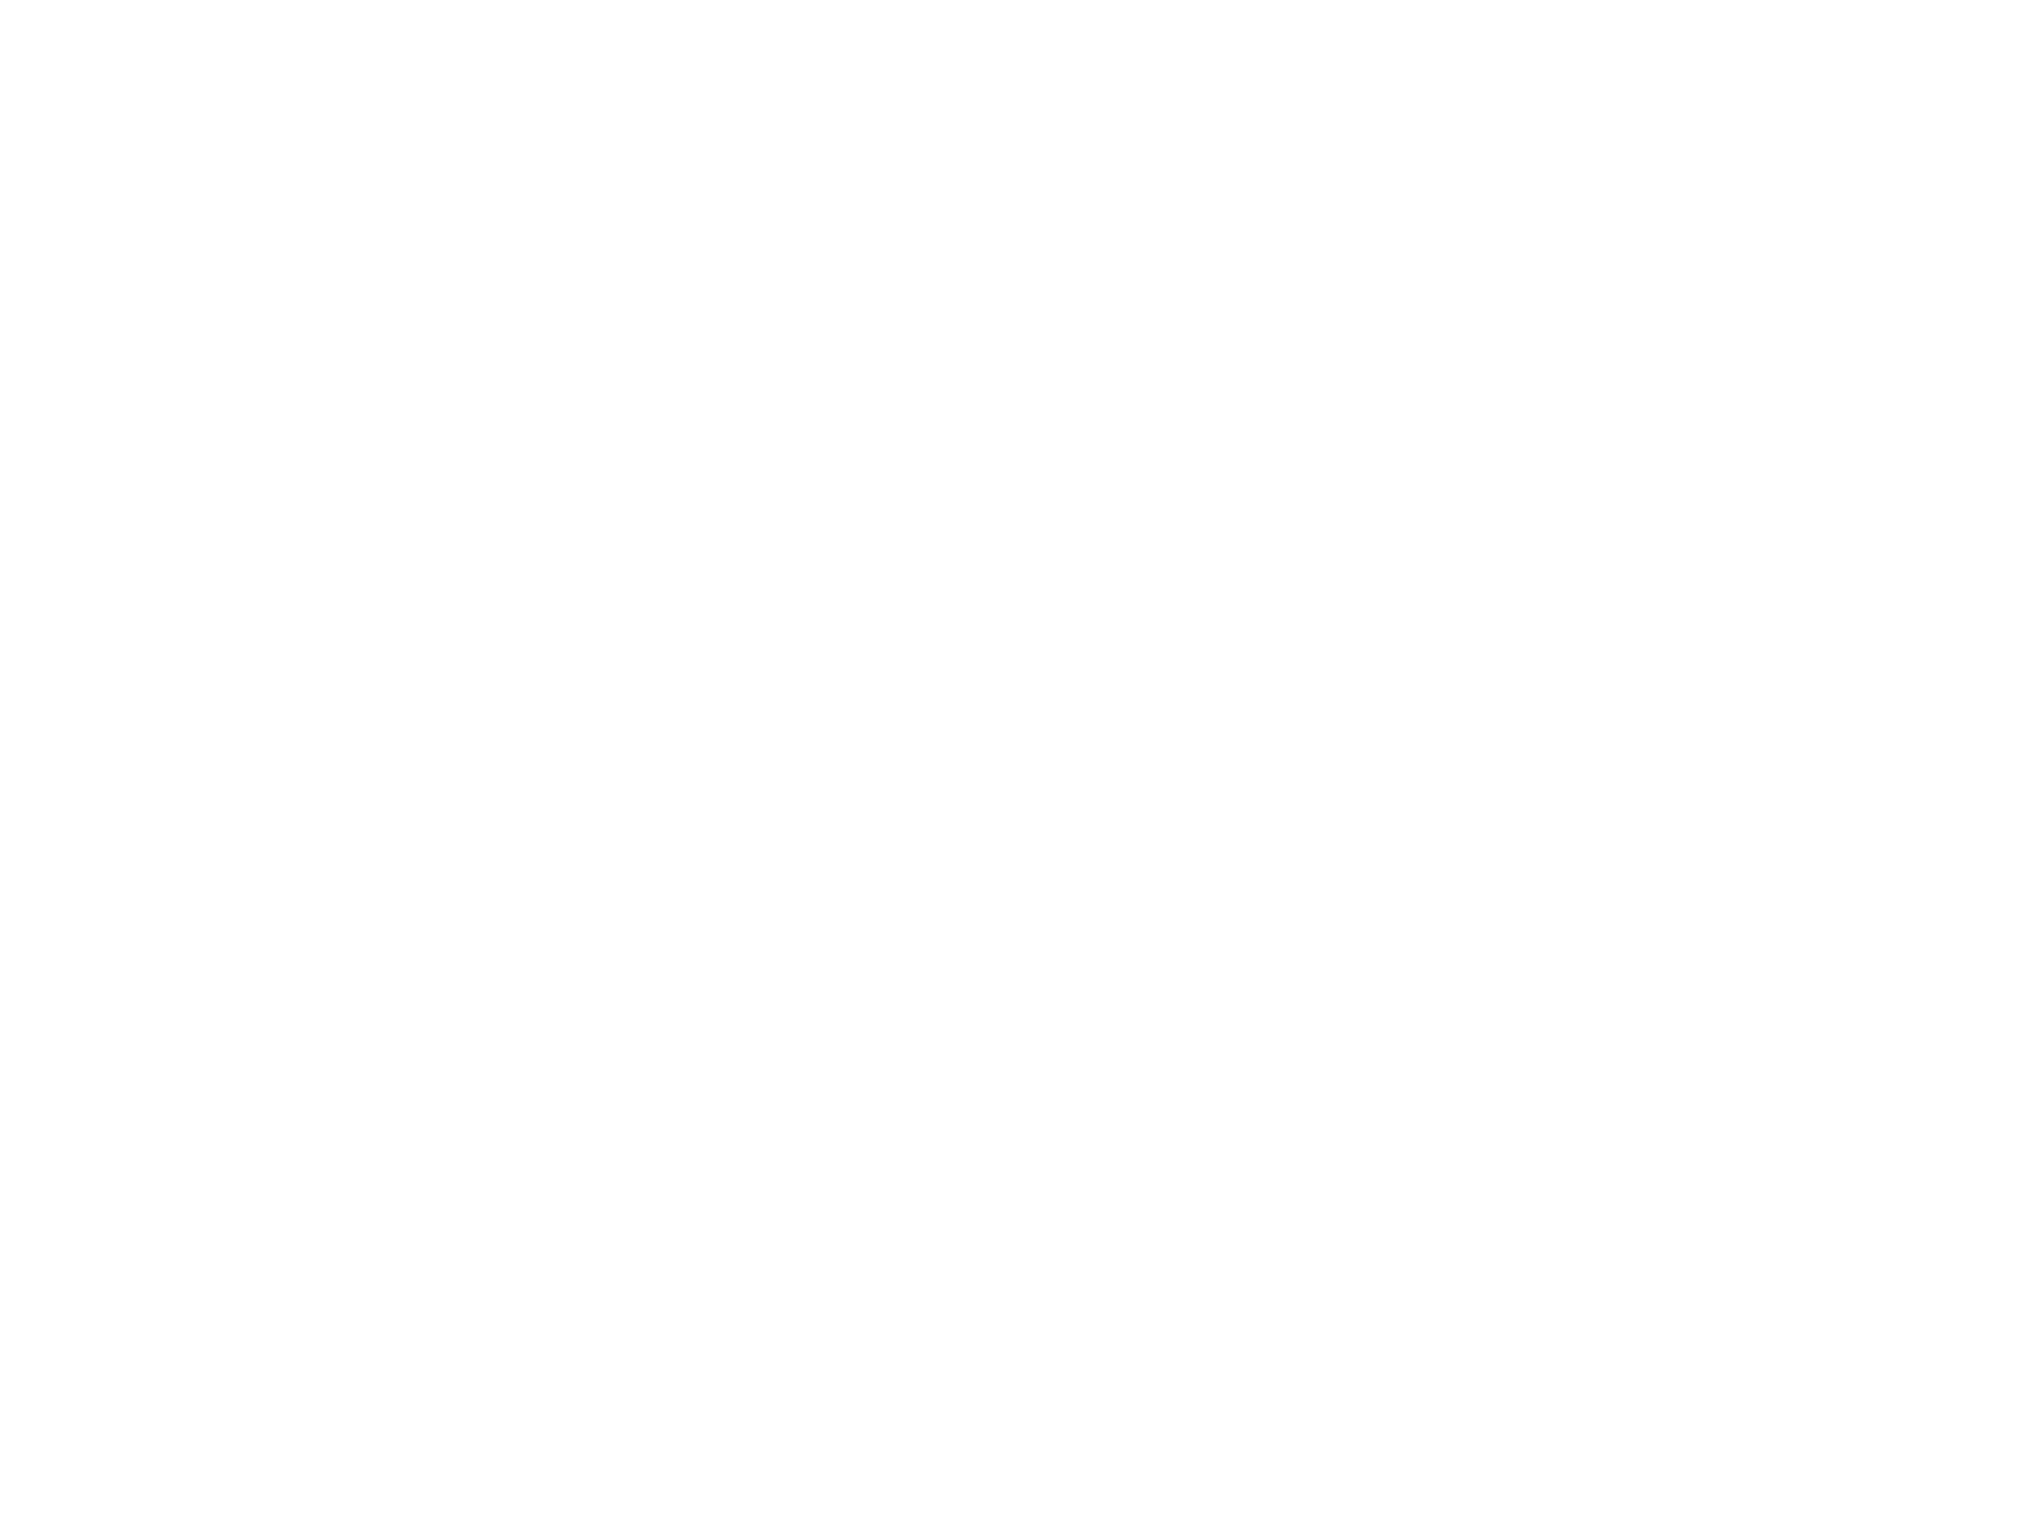

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Set the Pillow writer as the animation writer
plt.rcParams['animation.writer'] = 'pillow'

def display(source, driver, generated=None):
    fig = plt.figure(figsize=(20, 15))
    arr = []
    
    # Define the number of images to display in each frame
    num_images = 2 if generated is None else 3  # Adjust based on whether generated images are provided

    for i in range(len(driver)):
        col = [source, driver[i]]
        
        if generated is not None:
            col.append(generated[i])
        
        # Create a new list for the images in this frame
        frame_images = []

        for img in col:
            # Create a new subplot for each image
            ax = fig.add_subplot(1, num_images, len(frame_images) + 1)
            ax.axis('off')  # Hide the axes
            ax.imshow(img)  # Pass the image data to imshow
            frame_images.append(ax)

        arr.append(frame_images)  # Append the frame's images to the array for animation

    # Create the animation
    anime = animation.ArtistAnimation(fig, arr, interval=500, repeat_delay=1000)

    return anime

# Create the animation
anim = display(source_image, driver_video)

# Save the animation as a GIF instead of trying to convert it to HTML5 video
anim.save('animation.gif', writer='pillow', fps=30)

# Load the GIF to display
HTML('<img src="animation.gif" />')


In [6]:
from demo import load_checkpoints
generator, kp_detector = load_checkpoints(config_path=r"C:\Users\USER\Desktop\Deep fake\first-order-model\config\vox-256.yaml", checkpoint_path=r"C:\Users\USER\Desktop\Deep fake\vox-adv-cpk.pth",)


In [7]:
from demo import make_animation
from skimage import img_as_ubyte

prediction = make_animation(source_image,driver_video,generator,kp_detector)


100%|██████████| 364/364 [00:11<00:00, 32.41it/s]


In [20]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML, display
from demo import load_checkpoints, make_animation
from skimage import img_as_ubyte

# Load the source image and driver video
source_image = imageio.imread(r"C:\Users\USER\Desktop\Deep fake\dataset\brunette-young-woman-posing.jpg")
driver_video = imageio.get_reader(r"C:\Users\USER\Downloads\Video\4587767-sd_426_240_25fps.mp4")

# Resize the source image and driver video frames
source_image = resize(source_image, (256, 256))
driver_video = [resize(frame, (256, 256)) for frame in driver_video]

def create_animation_display(source, driver, generated=None):
    fig = plt.figure(figsize=(20, 15))
    arr = []
    
    # Define the number of images to display per frame (source, driver, and optionally generated)
    num_images = 2 if generated is None else 3  # Adjust based on whether generated images are provided

    for i in range(len(driver)):
        col = [source, driver[i]]
        
        if generated is not None:
            col.append(generated[i])
        
        # Create a new list for the images in this frame
        frame_images = []

        for img in col:
            # Create a new subplot for each image
            ax = fig.add_subplot(1, num_images, len(frame_images) + 1)
            ax.axis('off')  # Hide the axes
            ax.imshow(img)  # Pass the image data to imshow
            frame_images.append(ax)

        arr.append(frame_images)  # Append the frame's images to the array for animation

    # Create the animation
    anime = animation.ArtistAnimation(fig, arr, interval=500, repeat_delay=1000)

    return anime

# Load checkpoints
generator, kp_detector = load_checkpoints(config_path=r"C:\Users\USER\Desktop\Deep fake\first-order-model\config\vox-256.yaml", 
                                          checkpoint_path=r"C:\Users\USER\Desktop\Deep fake\vox-adv-cpk.pth")

# Generate prediction (fake animation)
prediction = make_animation(source_image, driver_video, generator, kp_detector)

# Check if prediction was successfully generated
if prediction is not None and len(prediction) > 0:
    print("Generated prediction successfully. Saving video...")

    # Convert prediction frames to uint8 format for saving
    prediction = [img_as_ubyte(frame) for frame in prediction]

    # Save the generated frames as a video using ffmpeg (via imageio)
    output_filename = 'generated_video.mp4'
    imageio.mimsave(output_filename, prediction, fps=30)

    print(f"Video saved as {output_filename}")
    
    # Optionally display the video using HTML
    display(HTML(f'<video width="600" controls><source src="{output_filename}" type="video/mp4"></video>'))
else:
    print("No prediction frames generated.")


100%|██████████| 394/394 [00:21<00:00, 17.95it/s]


Generated prediction successfully. Saving video...
Video saved as generated_video.mp4
